In [2]:
# Basic building-block packages
import numpy as np
from numpy import heaviside as th

# For numerical solutions of ODEs
from scipy.integrate import solve_ivp

# Some fancy-smancy maths!! (not really)
from scipy.stats import linregress
from numpy.linalg import norm

# For pretty-pretty graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Quality of life shit
from tqdm import tqdm
import pickle

import scipy.fftpack as fft



def NIC(x,a,b,B):
    g = -a*x*(th(x+B,1)-th(x-B,1)) # Centre
    g += (b*x+(a+b)*B)*th(-x-B,1) # Lefterior
    g += (b*x-(a+b)*B)*th(x-B,1) # Righterior
    return g

def Chua(x,a1,b1,B1,a2,b2,B2):
    return NIC(x,a1,b1,B1)+NIC(x,a2,b2,B2)

def sys_DE(t,w,inte,exte,circ):
    """
    Defines Chua's equations

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x,y,z = w
    R,C1,C2,L,F,freq = circ
    dx = ((y-x)/R-Chua(x,*inte,*exte))/C1
    dy = ((x-y)/R+z)/C2
    dz = -y/L-(F*np.sin(2*np.pi*freq*t))/L
    return dx,dy,dz

def standardise(x,y,z,t,step=1):
    z = ((z[:-1]-z[1:])/(t[:-1]-t[1:])*L)[::step]
    x = x[1::step]
    y = y[1::step]
    t = t[1::step]
    return x,y,z,t

def max_lyapunov(X1,X2):
    X1_0,X2_0 = X1[0],X2[0]

    dX = [x1-x2 for x1,x2 in zip(X1,X2)]
    dX = np.linalg.norm(dX,axis=0)

    dX0 = [X1-X2 for X1,X2 in zip(X1_0,X2_0)]
    dX0 = np.linalg.norm(dX0)

    y = dX/dX0
    t = data[0][3]

    fit = linregress(t,y)
    m = fit.slope
    b = fit.intercept
    corr = fit.rvalue
    return m,b,corr

In [269]:
handle = open("high_freq.pkl", 'rb')
data=pickle.load(handle)
handle.close()

freq = np.round(np.linspace(5e2,7.5e3,200),decimals=3) # High freq
amp = np.round(np.linspace(5e-2,2,75),decimals=3)

data1 = {}
for f in freq:
        data1[f] = data[f][0]
            
handle0= handle = open("high_freq(3).pkl", 'rb')
dataH=pickle.load(handle0)
data0 = {}
for F in amp:
    data0[F] = {}
    for f in freq:
            data0[F][f] = dataH[F][f][0]

In [169]:
handle1 = open("low_freq.pkl", 'rb')
dataL=pickle.load(handle1)
handle.close()

## Bifurcation Diagram(1)

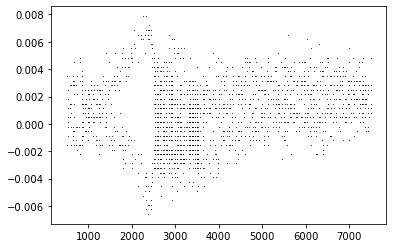

In [97]:
# Function to collect x at y=0
def find_x_zeros(x, y, eps): return x[np.abs(y)<eps]
x_intercepts = []
eps = 1e-3

for i in tqdm(freq):
    x_sol = data1[i][1]
    y_sol = data1[i][2]
    # Finding Vx at Vy=0
    x_intercepts.append(find_x_zeros(x_sol, y_sol, eps))

# Plotting
for i in range(len(freq)):
        plt.plot(freq[i]*np.ones(len(x_intercepts[i])), x_intercepts[i], 'o', color='k', markersize=1, markeredgecolor='none')
        
for var in [x_sol,y_sol,z_sol]:
    plot.scatter(time, var,s=0.3)

  0%|                                                                                           | 0/75 [00:00<?, ?it/s]

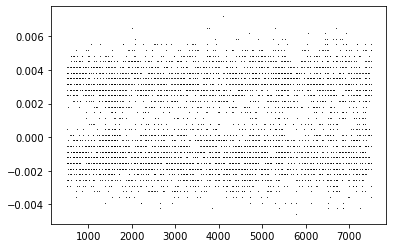

  1%|█                                                                                  | 1/75 [00:01<01:33,  1.26s/it]

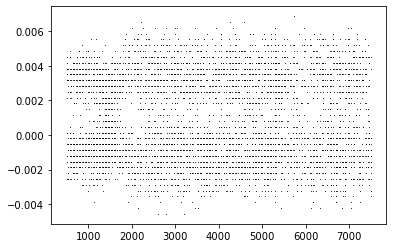

  3%|██▏                                                                                | 2/75 [00:03<01:57,  1.60s/it]

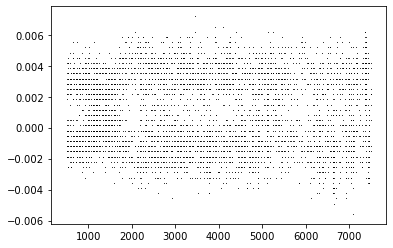

  4%|███▎                                                                               | 3/75 [00:04<01:42,  1.42s/it]

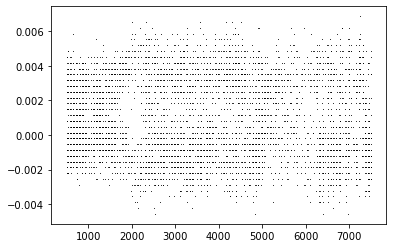

  5%|████▍                                                                              | 4/75 [00:05<01:32,  1.30s/it]

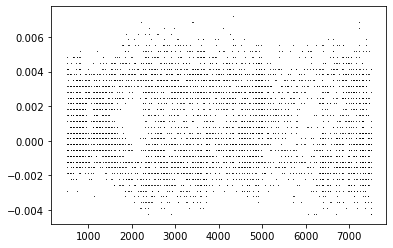

  7%|█████▌                                                                             | 5/75 [00:06<01:26,  1.23s/it]

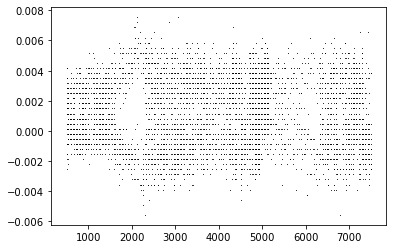

  8%|██████▋                                                                            | 6/75 [00:08<01:27,  1.26s/it]

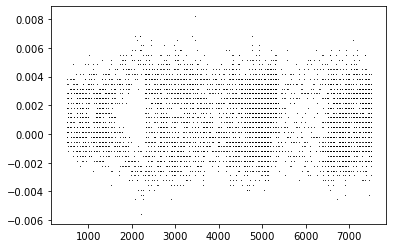

  9%|███████▋                                                                           | 7/75 [00:09<01:23,  1.23s/it]

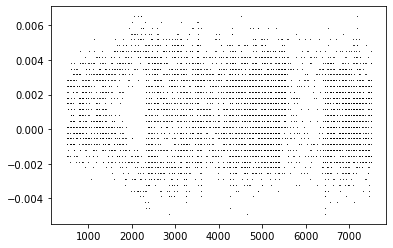

 11%|████████▊                                                                          | 8/75 [00:10<01:18,  1.17s/it]

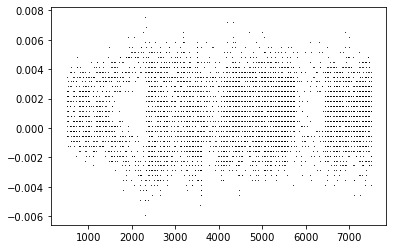

 12%|█████████▉                                                                         | 9/75 [00:11<01:14,  1.13s/it]

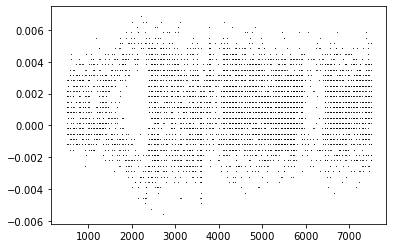

 13%|██████████▉                                                                       | 10/75 [00:12<01:12,  1.12s/it]

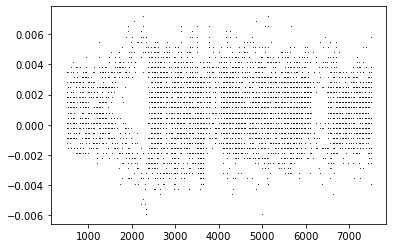

 15%|████████████                                                                      | 11/75 [00:13<01:16,  1.19s/it]

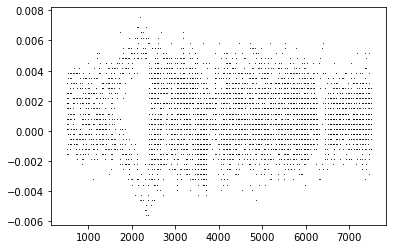

 16%|█████████████                                                                     | 12/75 [00:14<01:13,  1.16s/it]

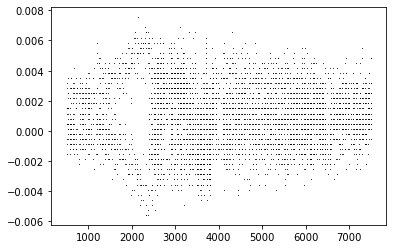

 17%|██████████████▏                                                                   | 13/75 [00:16<01:13,  1.18s/it]

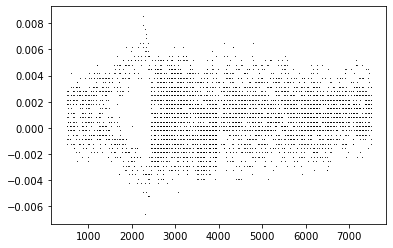

 19%|███████████████▎                                                                  | 14/75 [00:17<01:20,  1.32s/it]

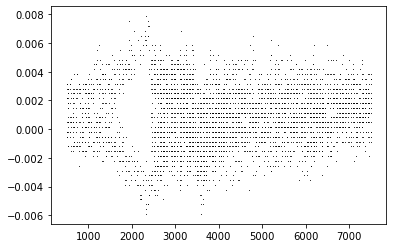

 20%|████████████████▍                                                                 | 15/75 [00:19<01:29,  1.49s/it]

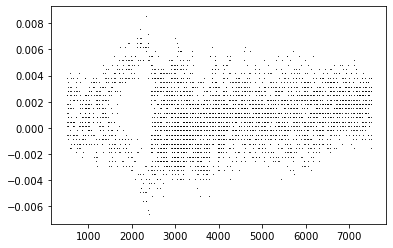

 21%|█████████████████▍                                                                | 16/75 [00:20<01:19,  1.35s/it]

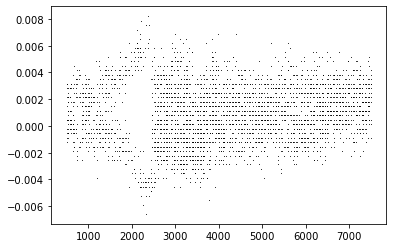

 23%|██████████████████▌                                                               | 17/75 [00:21<01:15,  1.29s/it]

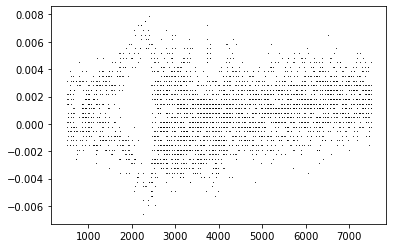

 24%|███████████████████▋                                                              | 18/75 [00:22<01:09,  1.22s/it]

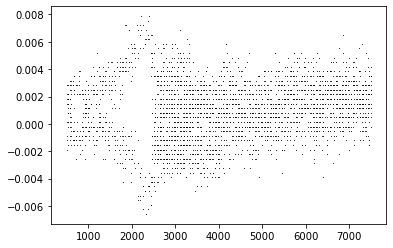

 25%|████████████████████▊                                                             | 19/75 [00:23<01:03,  1.13s/it]

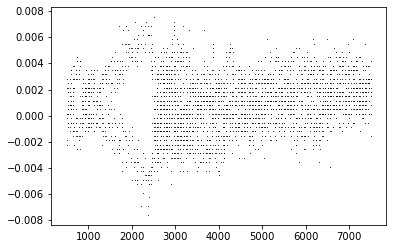

 27%|█████████████████████▊                                                            | 20/75 [00:25<01:04,  1.17s/it]

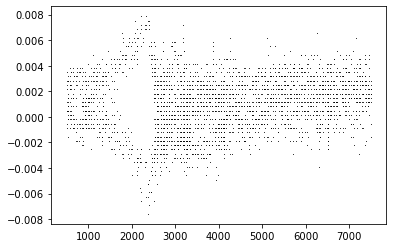

 28%|██████████████████████▉                                                           | 21/75 [00:26<01:01,  1.13s/it]

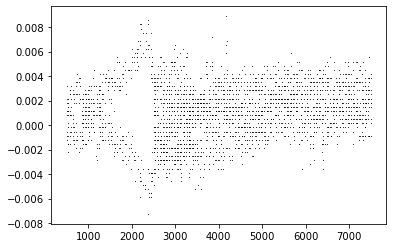

 29%|████████████████████████                                                          | 22/75 [00:27<00:57,  1.09s/it]

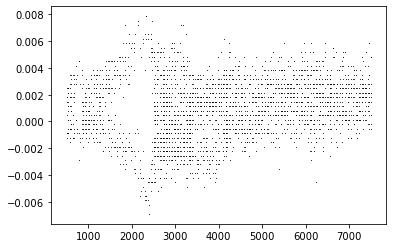

 31%|█████████████████████████▏                                                        | 23/75 [00:28<00:56,  1.08s/it]

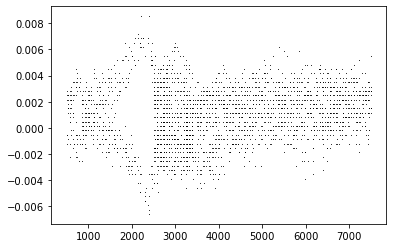

 32%|██████████████████████████▏                                                       | 24/75 [00:29<00:57,  1.12s/it]

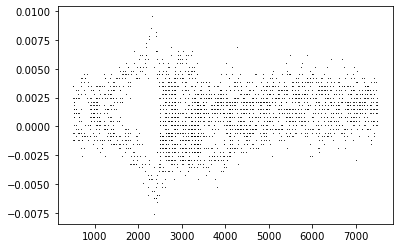

 33%|███████████████████████████▎                                                      | 25/75 [00:30<00:52,  1.06s/it]

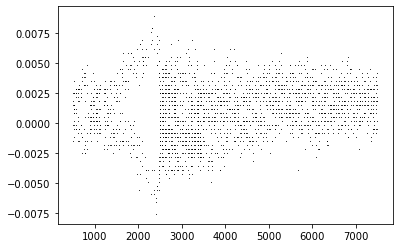

 35%|████████████████████████████▍                                                     | 26/75 [00:31<00:49,  1.02s/it]

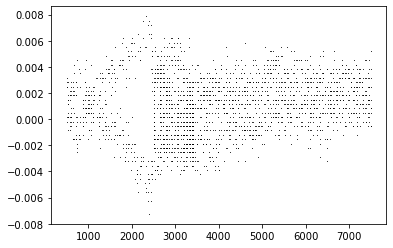

 36%|█████████████████████████████▌                                                    | 27/75 [00:32<00:47,  1.00it/s]

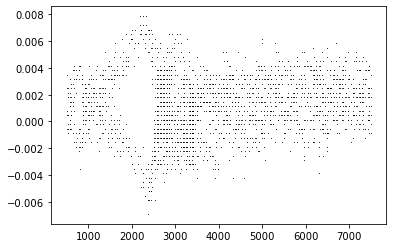

 37%|██████████████████████████████▌                                                   | 28/75 [00:33<00:45,  1.03it/s]

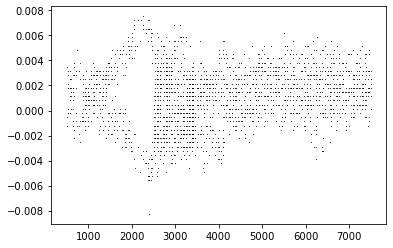

 39%|███████████████████████████████▋                                                  | 29/75 [00:34<00:49,  1.07s/it]

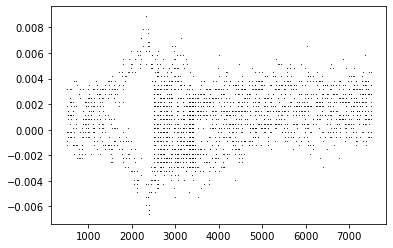

 40%|████████████████████████████████▊                                                 | 30/75 [00:35<00:45,  1.02s/it]

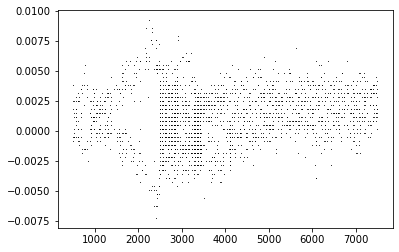

 41%|█████████████████████████████████▉                                                | 31/75 [00:36<00:44,  1.00s/it]

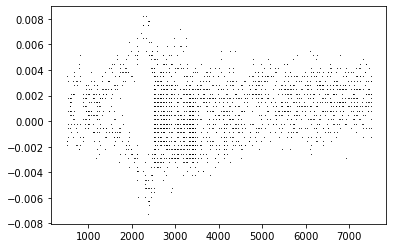

 43%|██████████████████████████████████▉                                               | 32/75 [00:37<00:42,  1.02it/s]

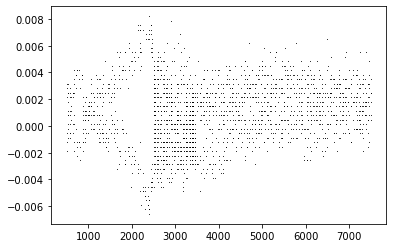

 44%|████████████████████████████████████                                              | 33/75 [00:38<00:44,  1.05s/it]

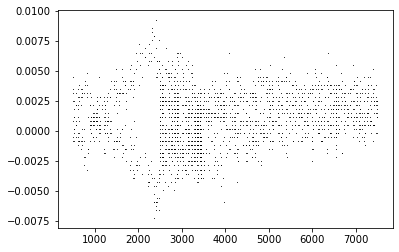

 45%|█████████████████████████████████████▏                                            | 34/75 [00:39<00:43,  1.05s/it]

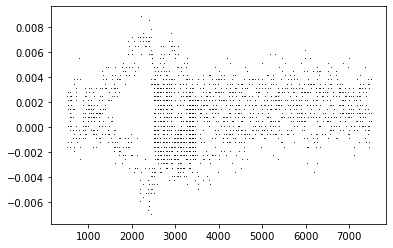

 47%|██████████████████████████████████████▎                                           | 35/75 [00:40<00:40,  1.00s/it]

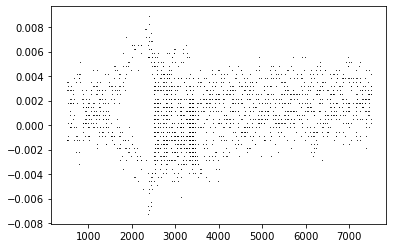

 48%|███████████████████████████████████████▎                                          | 36/75 [00:41<00:38,  1.02it/s]

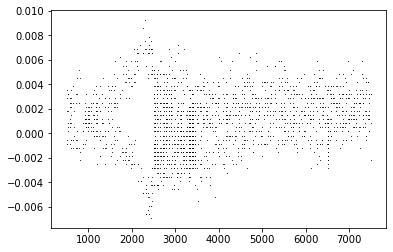

 49%|████████████████████████████████████████▍                                         | 37/75 [00:42<00:35,  1.07it/s]

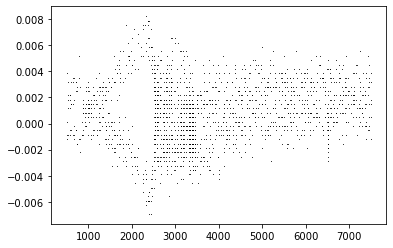

 51%|█████████████████████████████████████████▌                                        | 38/75 [00:43<00:36,  1.01it/s]

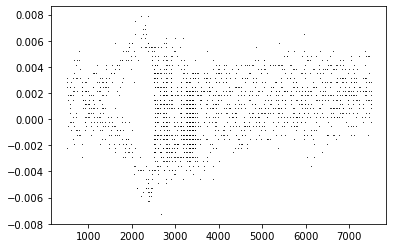

 52%|██████████████████████████████████████████▋                                       | 39/75 [00:44<00:35,  1.01it/s]

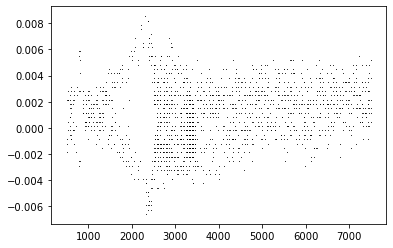

 53%|███████████████████████████████████████████▋                                      | 40/75 [00:45<00:35,  1.01s/it]

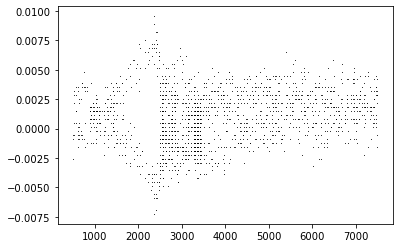

 55%|████████████████████████████████████████████▊                                     | 41/75 [00:46<00:34,  1.01s/it]

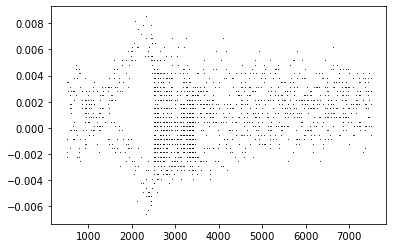

 56%|█████████████████████████████████████████████▉                                    | 42/75 [00:47<00:34,  1.05s/it]

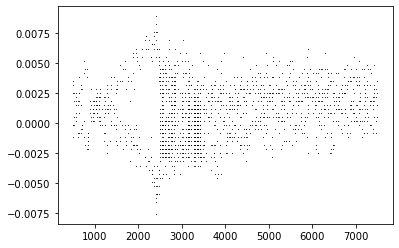

 57%|███████████████████████████████████████████████                                   | 43/75 [00:48<00:31,  1.00it/s]

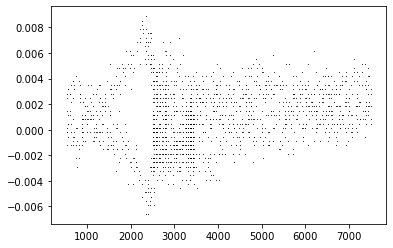

 59%|████████████████████████████████████████████████                                  | 44/75 [00:49<00:29,  1.04it/s]

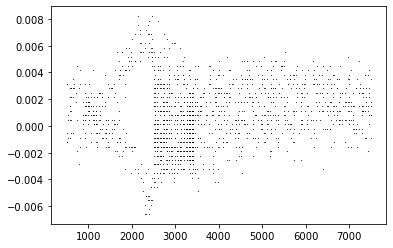

 60%|█████████████████████████████████████████████████▏                                | 45/75 [00:49<00:27,  1.08it/s]

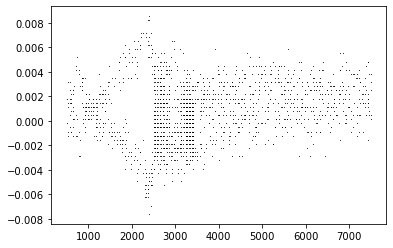

 61%|██████████████████████████████████████████████████▎                               | 46/75 [00:50<00:25,  1.12it/s]

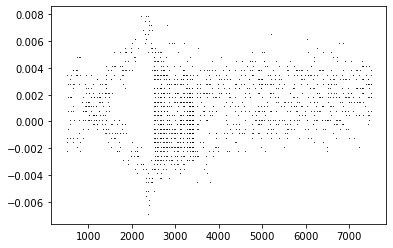

 63%|███████████████████████████████████████████████████▍                              | 47/75 [00:51<00:26,  1.07it/s]

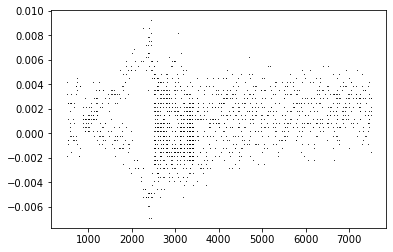

 64%|████████████████████████████████████████████████████▍                             | 48/75 [00:52<00:24,  1.11it/s]

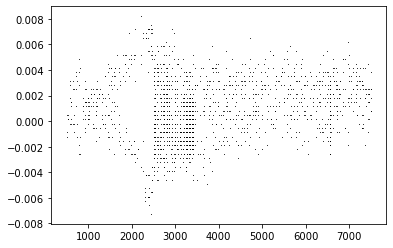

 65%|█████████████████████████████████████████████████████▌                            | 49/75 [00:53<00:22,  1.15it/s]

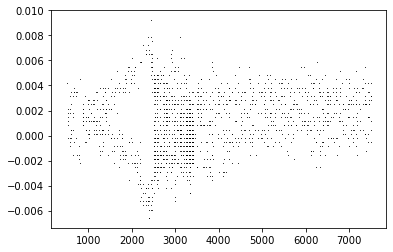

 67%|██████████████████████████████████████████████████████▋                           | 50/75 [00:54<00:21,  1.18it/s]

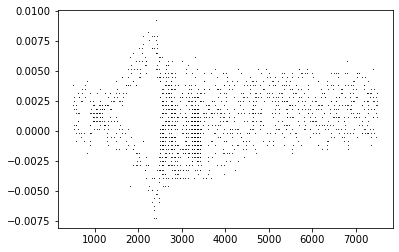

 68%|███████████████████████████████████████████████████████▊                          | 51/75 [00:55<00:22,  1.08it/s]

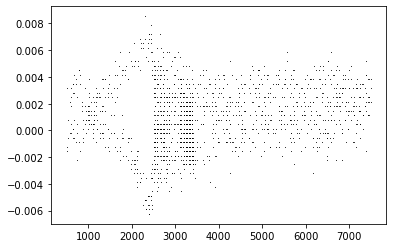

 69%|████████████████████████████████████████████████████████▊                         | 52/75 [00:56<00:20,  1.11it/s]

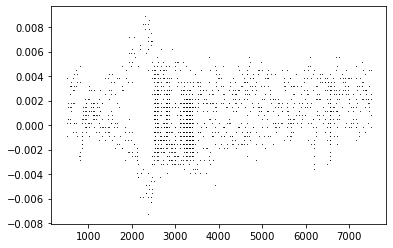

 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [00:56<00:19,  1.16it/s]

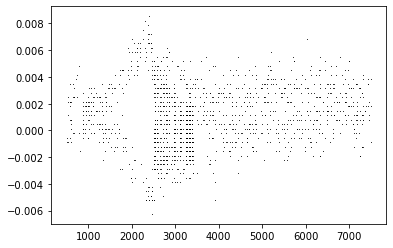

 72%|███████████████████████████████████████████████████████████                       | 54/75 [00:57<00:17,  1.18it/s]

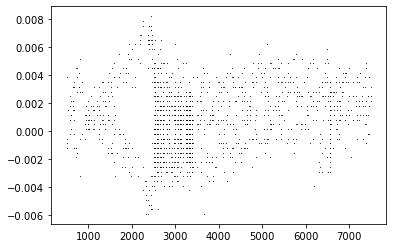

 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [00:58<00:16,  1.18it/s]

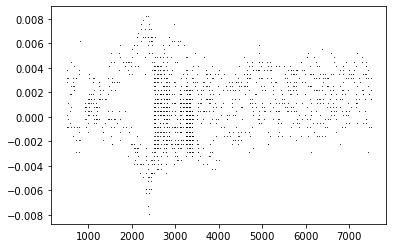

 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [00:59<00:17,  1.09it/s]

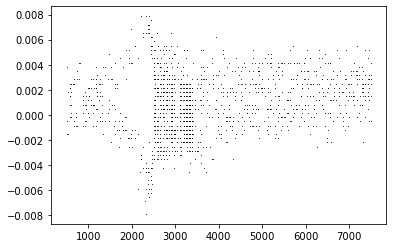

 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [01:00<00:16,  1.06it/s]

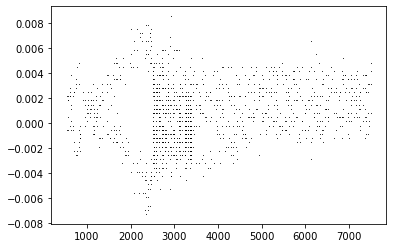

 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [01:01<00:16,  1.06it/s]

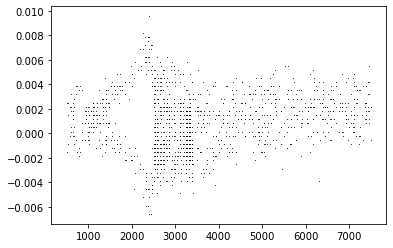

 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [01:02<00:14,  1.08it/s]

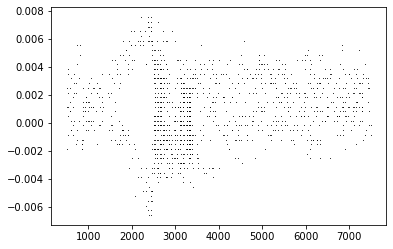

 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [01:03<00:14,  1.01it/s]

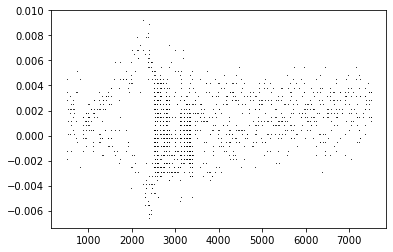

 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [01:04<00:13,  1.03it/s]

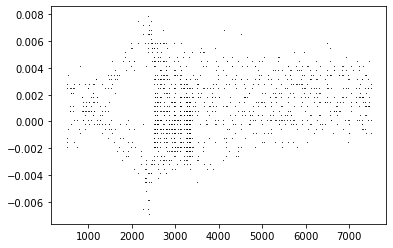

 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [01:05<00:12,  1.02it/s]

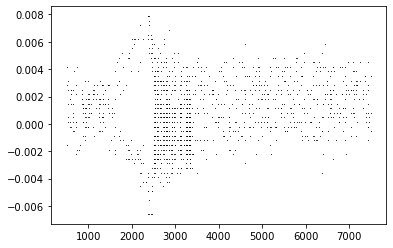

 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [01:06<00:11,  1.02it/s]

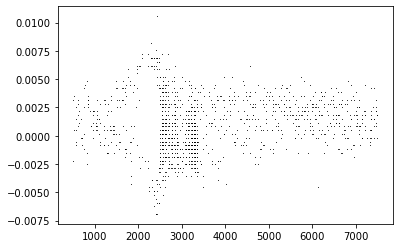

 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [01:07<00:10,  1.04it/s]

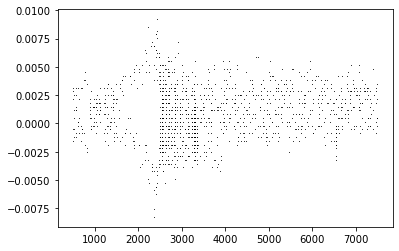

 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [01:08<00:09,  1.01it/s]

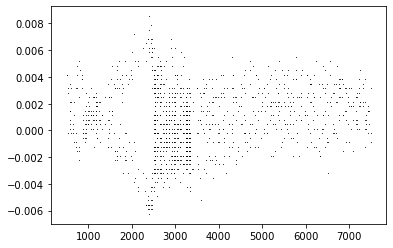

 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [01:09<00:08,  1.06it/s]

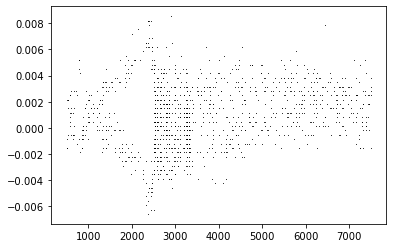

 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [01:10<00:07,  1.10it/s]

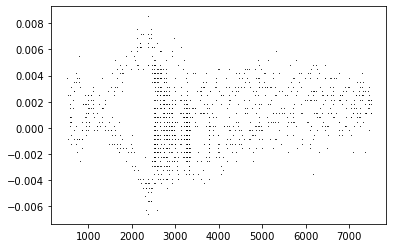

 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [01:11<00:06,  1.13it/s]

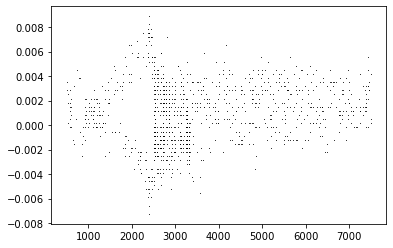

 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [01:12<00:05,  1.04it/s]

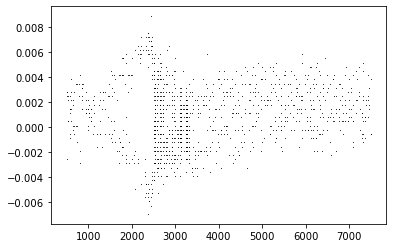

 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [01:12<00:04,  1.08it/s]

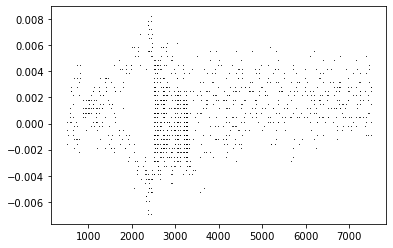

 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [01:13<00:03,  1.12it/s]

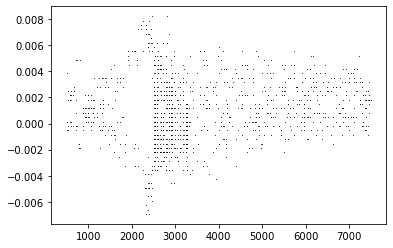

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [01:14<00:02,  1.15it/s]

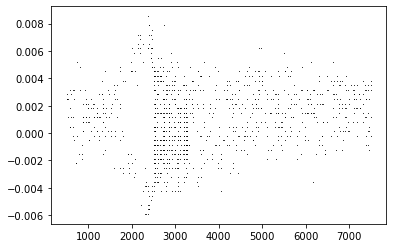

 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [01:15<00:01,  1.15it/s]

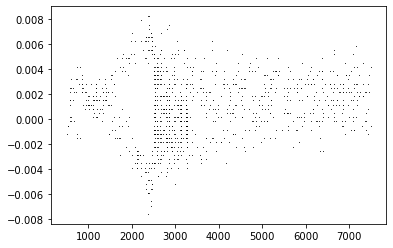

 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [01:16<00:00,  1.07it/s]

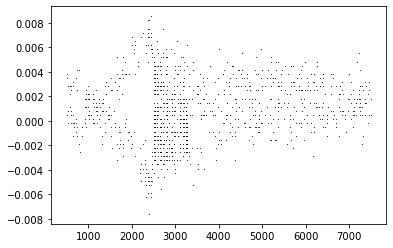

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:17<00:00,  1.03s/it]


In [170]:
# Function to collect x at y=0
def find_x_zeros(x, y, eps): return x[np.abs(y)<eps]
x_intercepts = []
eps = 1e-3

for i in tqdm(amp):
    for j in freq:
        x_sol = data0[i][j][1]
        y_sol = data0[i][j][2]

        # Finding Vx at Vy=0
        plt.plot(j*np.ones(len(find_x_zeros(x_sol, y_sol, eps))), find_x_zeros(x_sol, y_sol, eps), 'o', color='k', markersize=1, markeredgecolor='none')
    plt.show()

## Bifurcation Diagram(2)

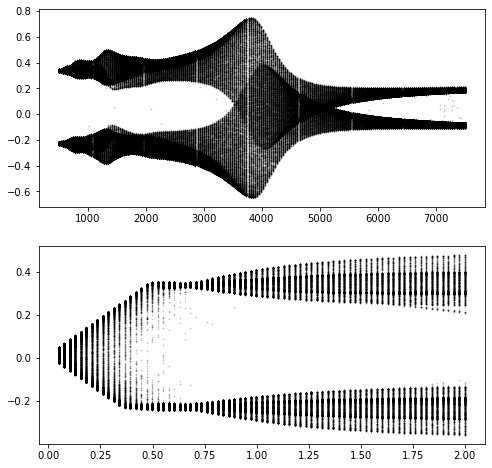

In [278]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,hspace=1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])
axs3 = plt.subplot(grid[2,0])
axs4 = plt.subplot(grid[3,0])

f_maxes = []
x_maxes = []
f_mins = []
x_mins = []

for f in freq:
    F=1.051
    t = data0[F][f][0]
    X = data0[F][f][1]
    Y = data0[F][f][2]
    for i in range(1, len(Y) - 1):
        # save the local maxima
        if Y[i - 1] < Y[i] and Y[i] > Y[i + 1]:
            f_maxes.append(f)
            x_maxes.append(X[i])
        # save the local minima
        elif Y[i - 1] > Y[i] and Y[i] < Y[i + 1]:
            f_mins.append(f)
            x_mins.append(X[i])            
axs1.scatter(f_maxes, x_maxes, color="black", s=0.5, alpha=0.2)

F_maxes = []
X_maxes = []
F_mins = []
X_mins = []

for F in amp:
    f=816.583
    t = data0[F][f][0]
    X = data0[F][f][1]
    Y = data0[F][f][2]
    for i in range(1, len(Y) - 1):
        # save the local maxima
        if Y[i - 1] < Y[i] and Y[i] > Y[i + 1]:
            F_maxes.append(F)
            X_maxes.append(X[i])
        # save the local minima
        elif Y[i - 1] > Y[i] and Y[i] < Y[i + 1]:
            F_mins.append(F)
            X_mins.append(X[i])
axs2.scatter(F_maxes, X_maxes, color="black", s=0.5, alpha=0.2)

plt.savefig('freq_amp.png')

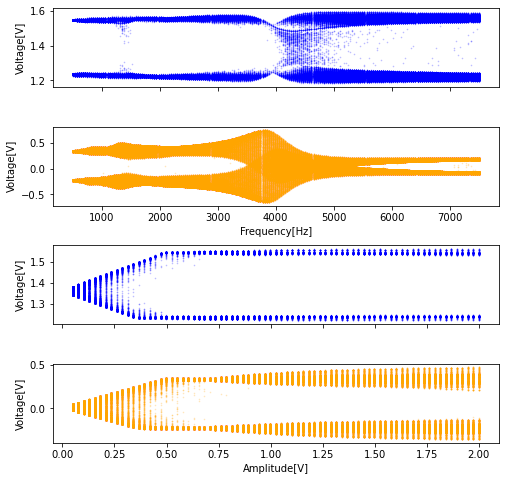

In [293]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(4,1,hspace=0.5)

axs1 = plt.subplot(grid[0,0])
plt.xticks(visible=False)
axs3 = plt.subplot(grid[1,0], sharex=axs1)
axs2 = plt.subplot(grid[2,0])
plt.xticks(visible=False)
axs4 = plt.subplot(grid[3,0], sharex=axs4)

f1_maxes = []
x1_maxes = []
f1_mins = []
x1_mins = []

for f in freq:
    F=1.051
    t = data0[F][f][0]
    X = data0[F][f][1]
    Y = data0[F][f][2]
    for i in range(1, len(Y) - 1):
        # save the local maxima
        if Y[i - 1] < Y[i] and Y[i] > Y[i + 1]:
            f1_maxes.append(f)
            x1_maxes.append(X[i])
        # save the local minima
        elif Y[i - 1] > Y[i] and Y[i] < Y[i + 1]:
            f1_mins.append(f)
            x1_mins.append(X[i])            
axs3.scatter(f1_maxes, x1_maxes, color="orange", s=0.5, alpha=0.2)

F1_maxes = []
X1_maxes = []
F1_mins = []
X1_mins = []

for F in amp:
    f=816.583
    t = data0[F][f][0]
    X = data0[F][f][1]
    Y = data0[F][f][2]
    for i in range(1, len(Y) - 1):
        # save the local maxima
        if Y[i - 1] < Y[i] and Y[i] > Y[i + 1]:
            F1_maxes.append(F)
            X1_maxes.append(X[i])
        # save the local minima
        elif Y[i - 1] > Y[i] and Y[i] < Y[i + 1]:
            F1_mins.append(F)
            X1_mins.append(X[i])
axs4.scatter(F1_maxes, X1_maxes, color="orange", s=0.5, alpha=0.2)

plt.savefig('freq_amp.png')

f_maxes = []
x_maxes = []
f_mins = []
x_mins = []

for f in freq:
    F=1.051
    t = data0[F][f][0]
    X = data0[F][f][1]
    Y = data0[F][f][2]
    for i in range(1, len(Y) - 1):
        # save the local maxima
        if X[i - 1] < X[i] and X[i] > X[i + 1]:
            f_maxes.append(f)
            x_maxes.append(Y[i])
        # save the local minima
        elif Y[i - 1] > Y[i] and Y[i] < Y[i + 1]:
            f_mins.append(f)
            x_mins.append(X[i])            
axs1.scatter(f_maxes, x_maxes, color="blue", s=0.5, alpha=0.2)

F_maxes = []
X_maxes = []
F_mins = []
X_mins = []

for F in amp:
    f=816.583
    t = data0[F][f][0]
    X = data0[F][f][1]
    Y = data0[F][f][2]
    for i in range(1, len(Y) - 1):
        # save the local maxima
        if X[i - 1] < X[i] and X[i] > X[i + 1]:
            F_maxes.append(F)
            X_maxes.append(Y[i])
        # save the local minima
        elif Y[i - 1] > [i] and Y[i] < Y[i + 1]:
            F_mins.append(F)
            X_mins.append(X[i])
axs2.scatter(F_maxes, X_maxes, color="blue", s=0.5, alpha=0.2)

axs1.set_ylabel("Voltage[V]")
axs2.set_ylabel("Voltage[V]")


axs3.set_xlabel("Frequency[Hz]")
axs3.set_ylabel("Voltage[V]")

axs4.set_xlabel("Amplitude[V]")
axs4.set_ylabel("Voltage[V]")



plt.savefig('freq_amp.png')

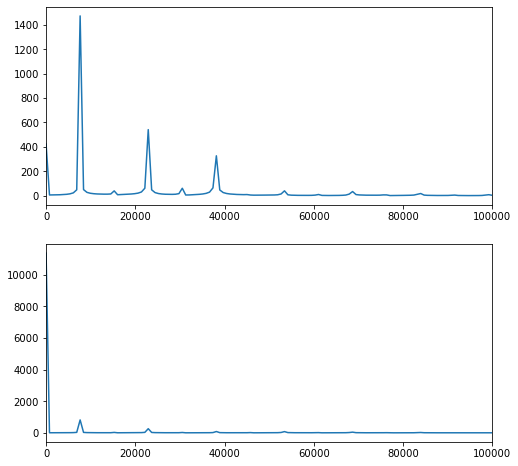

In [267]:
F=2
f=816.583

t = data0[F][f][0]
X = data0[F][f][1]
Y = data0[F][f][2]
Xf = fft.fft(X)
Yf = fft.fft(Y)

samp = len(X)
tau = time[1]-time[0] # time interval

freq = fft.fftfreq(len(X), tau)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])

axs1.set_xlim(left=0, right=100000, emit=True, auto=False)
axs2.set_xlim(left=0, right=100000, emit=True, auto=False)

axs1.plot(freq[freq>=0], np.abs(Xf)[freq>=0])
axs2.plot(freq[freq>=0], np.abs(Yf)[freq>=0])

In [262]:
print(amp)
print (freq)

[0.05  0.076 0.103 0.129 0.155 0.182 0.208 0.234 0.261 0.287 0.314 0.34
 0.366 0.393 0.419 0.445 0.472 0.498 0.524 0.551 0.577 0.603 0.63  0.656
 0.682 0.709 0.735 0.761 0.788 0.814 0.841 0.867 0.893 0.92  0.946 0.972
 0.999 1.025 1.051 1.078 1.104 1.13  1.157 1.183 1.209 1.236 1.262 1.289
 1.315 1.341 1.368 1.394 1.42  1.447 1.473 1.499 1.526 1.552 1.578 1.605
 1.631 1.657 1.684 1.71  1.736 1.763 1.789 1.816 1.842 1.868 1.895 1.921
 1.947 1.974 2.   ]
[ 500.     535.176  570.352  605.528  640.704  675.879  711.055  746.231
  781.407  816.583  851.759  886.935  922.111  957.286  992.462 1027.638
 1062.814 1097.99  1133.166 1168.342 1203.518 1238.693 1273.869 1309.045
 1344.221 1379.397 1414.573 1449.749 1484.925 1520.101 1555.276 1590.452
 1625.628 1660.804 1695.98  1731.156 1766.332 1801.508 1836.683 1871.859
 1907.035 1942.211 1977.387 2012.563 2047.739 2082.915 2118.09  2153.266
 2188.442 2223.618 2258.794 2293.97  2329.146 2364.322 2399.497 2434.673
 2469.849 2505.025 2540.201 2575

## Fast Fourier Transform

In [158]:
# sample spacing

for f in tqdm(freq):
#     time = data1[f][0]
    X = data1[f][1]
    Y = data1[f][2]
    
    Xf = fft.fft(x_sol)
    Yf = fft.fft(y_sol)

    samp = len(x_sol)
    tau = time[1]-time[0] # time interval

    freq = fft.fftfreq(len(x_sol), tau)

#     fig = plt.figure(figsize=(8,8))
#     grid = gs.GridSpec(2,1,wspace=0.1,)

#     axs1 = plt.subplot(grid[0,0])
#     axs2 = plt.subplot(grid[1,0])

#     axs1.set_xlim(left=0, right=100000, emit=True, auto=False)
#     axs2.set_xlim(left=0, right=100000, emit=True, auto=False)

#     axs1.plot(freq[freq>=0], np.abs(Xf)[freq>=0])
#     axs2.plot(freq[freq>=0], np.abs(Yf)[freq>=0])

    plt.scatter(X,Y)

    plt.show()

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]


IndexError: list index out of range

## Finding Appropreate Frequency (Phase+FFT+Poincare)

In [108]:
# Numerical integration by solve_ivp


for f in tqdm(freq):
    
    circ = [R,C1,C2,L,F,f]

    x_sol = data1[f][1]
    y_sol = data1[f][2]
    eps = 5e-5
    tau = 1e-6

    for j in range(len(z_sol)):
        if -eps<y_sol[j]<eps:
            if (y_sol[j+1]-y_sol[j])/(2*tau)<0:
                plt.scatter(freq, x_sol[j])
                
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'